In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_LZdllcl.csv')
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [55]:
# Show the number of rows and columns
print("Shape of dataset:", data.shape)

# Show data types of each column
print("\nData Types:\n", data.dtypes)

# Get a statistical summary
print("\nSummary Statistics:\n", data.describe(include='all'))

Shape of dataset: (54808, 14)

Data Types:
 employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

Summary Statistics:
          employee_id         department    region   education gender  \
count   54808.000000              54808     54808       52399  54808   
unique           NaN                  9        34           3      2   
top              NaN  Sales & Marketing  region_2  Bachelor's      m   
freq             NaN              16840     12343       36669  38496   
mean    39195.830627                NaN       NaN         NaN    NaN   
std     22586.581449                NaN 

In [56]:
# Get column names for numerical and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include='object').columns

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')
Categorical columns: Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


In [57]:
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())


Unique values in 'department':
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

Unique values in 'region':
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']

Unique values in 'education':
["Master's & above" "Bachelor's" nan 'Below Secondary']

Unique values in 'gender':
['f' 'm']

Unique values in 'recruitment_channel':
['sourcing' 'other' 'referred']


In [58]:
# Check how many missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


In [59]:
# Identify columns with missing values
cols_with_missing = data.columns[data.isnull().any()].tolist()

print("Columns with missing values:", cols_with_missing)

# Fill missing values with the mode of each column
for col in cols_with_missing:
    mode_val = data[col].mode()[0]  # mode() can return multiple values, take the first
    data[col].fillna(mode_val, inplace=True)

# Verify that there are no more missing values
print("\nMissing values after filling:\n", data.isnull().sum())

Columns with missing values: ['education', 'previous_year_rating']

Missing values after filling:
 employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


/tmp/ipython-input-59-1055874357.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_val, inplace=True)


In [60]:
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


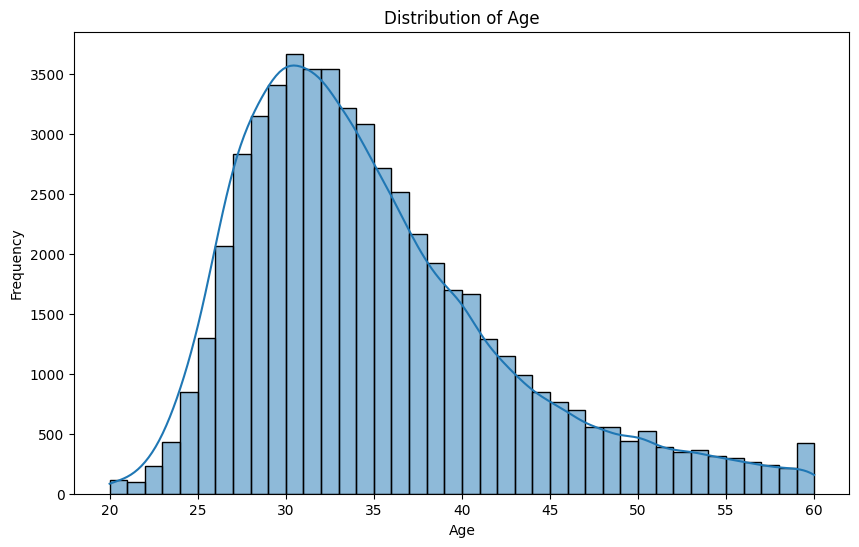

In [61]:
# Create a histogram of the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=40)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

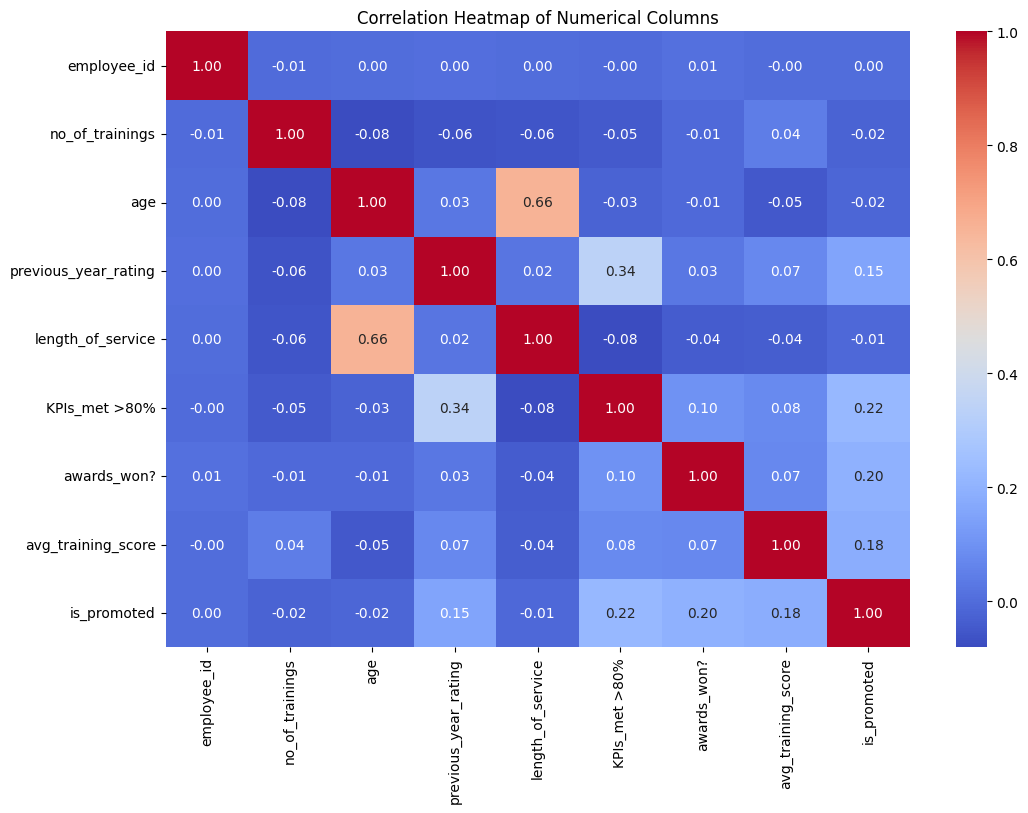

In [62]:
# Select only numerical columns for the correlation heatmap
numeric_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [63]:
#Feature Engineering
#age
for i in data:
    data.loc[(data['age'] > 19) & (data['age'] <= 25), 'age'] = 1
    data.loc[(data['age'] > 25) & (data['age'] <= 30), 'age'] = 2
    data.loc[(data['age'] > 30) & (data['age'] <= 35), 'age'] = 3
    data.loc[(data['age'] > 35) & (data['age'] <= 40), 'age'] = 4
    data.loc[(data['age'] > 40) & (data['age'] <= 45), 'age'] = 5
    data.loc[(data['age'] > 45) & (data['age'] <= 50), 'age'] = 6
    data.loc[data['age'] > 50, 'age'] = 7
data['age']

,age
0,3
1,2
2,3
3,4
4,5
...,...
54803,6
54804,4
54805,2
54806,2


In [64]:
# Get the count of each age category
age_counts = data['age'].value_counts().sort_index()

print("Count of different categories in age:")
print(age_counts)

Count of different categories in age:
age
1     3014
2    15104
3    16065
4     9963
5     5037
6     2773
7     2852
Name: count, dtype: int64


In [65]:
# Drop the 'employee_id' column
data = data.drop('employee_id', axis=1)

# Display the first few rows to confirm the column is dropped
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,2,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,4,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,5,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,6,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,4,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,2,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,2,1.0,2,0,0,45,0


/tmp/ipython-input-66-3304977363.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='is_promoted', data=promotion_by_region, palette='viridis')


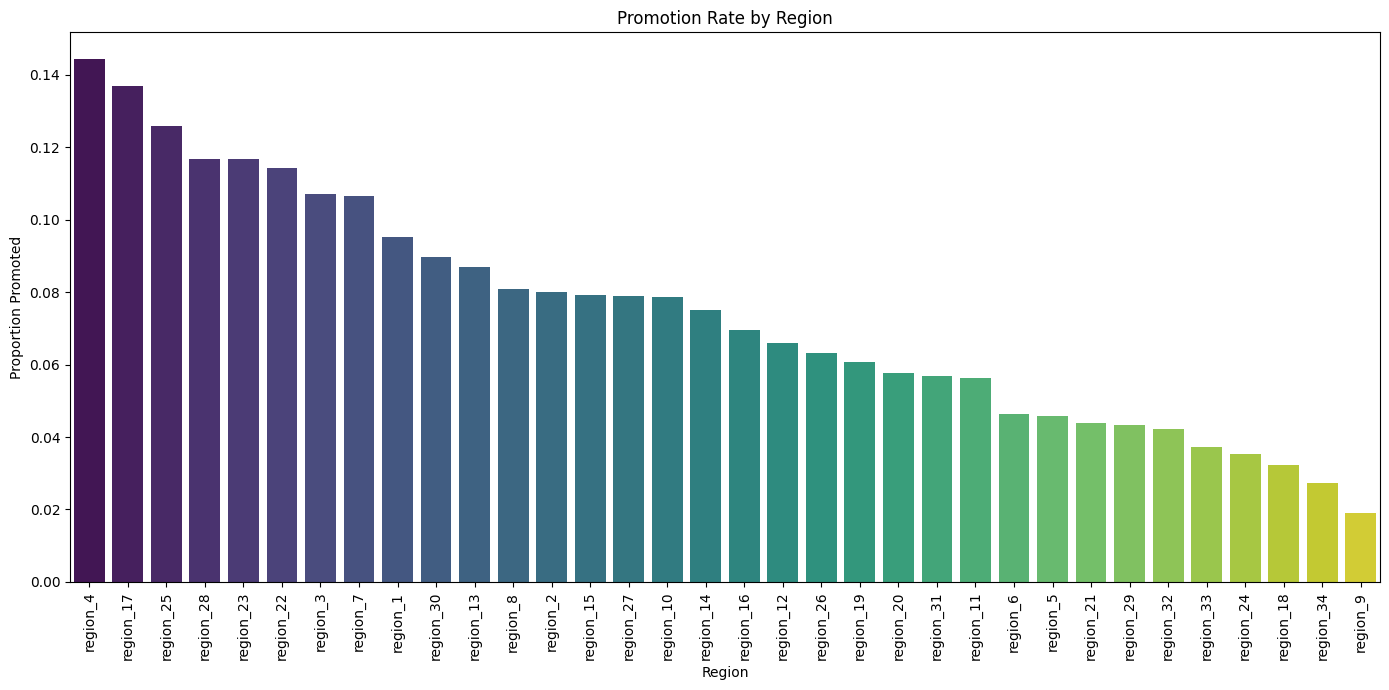

,region,is_promoted
28,region_4,0.144451
8,region_17,0.136935
17,region_25,0.125763
20,region_28,0.116844
15,region_23,0.116596
14,region_22,0.114188
22,region_3,0.106936
31,region_7,0.106546
0,region_1,0.095082
23,region_30,0.089802


In [66]:
# Calculate the proportion of promoted employees for each region
promotion_by_region = data.groupby('region')['is_promoted'].mean().reset_index()

# Sort the regions by promotion rate for better visualization
promotion_by_region = promotion_by_region.sort_values(by='is_promoted', ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='region', y='is_promoted', data=promotion_by_region, palette='viridis')
plt.title('Promotion Rate by Region')
plt.xlabel('Region')
plt.ylabel('Proportion Promoted')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the aggregated data
display(promotion_by_region)

In [67]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Apply Label Encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Display the first few rows of the modified DataFrame
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,3,5.0,8,1,0,49,0
1,4,14,0,1,0,1,2,5.0,4,0,0,60,0
2,7,10,0,1,2,1,3,3.0,7,0,0,50,0
3,7,15,0,1,0,2,4,1.0,10,0,0,50,0
4,8,18,0,1,0,1,5,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1,6,3.0,17,0,0,78,0
54804,4,19,2,0,0,1,4,2.0,6,0,0,56,0
54805,0,0,0,1,0,1,2,5.0,3,1,0,79,0
54806,7,33,0,1,2,1,2,1.0,2,0,0,45,0


In [68]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
# Assuming 'is_promoted' is the target variable
X = data.drop('is_promoted', axis=1)
y = data['is_promoted']

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the sample sizes of each split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (43846, 12)
Shape of X_test: (10962, 12)
Shape of y_train: (43846,)
Shape of y_test: (10962,)


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=400)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9196


In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the kNN model (you can choose a different number of neighbors)
knn_model = KNeighborsClassifier(n_neighbors=9)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"kNN Accuracy: {accuracy_knn:.4f}")

kNN Accuracy: 0.9309


In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model (you can choose different kernel and parameters)
svm_model = SVC(kernel='rbf',random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.92


In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

Naive Bayes Accuracy: 0.92


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.90


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=150,random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.9342


In [102]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the MLP Classifier model
# You can adjust the parameters like hidden_layer_sizes, max_iter, etc.
mlp_model = MLPClassifier(random_state=42, max_iter=500) # Increased max_iter for potential convergence

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy_mlp:.4f}")

MLP Classifier Accuracy: 0.9315


In [103]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting Classifier model
gbrt = GradientBoostingClassifier(random_state=42)

# Train the model
gbrt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbrt = gbrt.predict(X_test)

# Evaluate the model
accuracy_gbrt = accuracy_score(y_test, y_pred_gbrt)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gbrt:.4f}")

Gradient Boosting Classifier Accuracy: 0.9390


In [104]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost Classifier model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")

XGBoost Classifier Accuracy: 0.9418


In [120]:
data_test = pd.read_csv('https://datahack-prod.s3.amazonaws.com/test_file/test_2umaH9m.csv')
test_data = data_test.copy()
data_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [106]:
# Show the number of rows and columns
print("Shape of dataset:", data_test.shape)

# Show data types of each column
print("\nData Types:\n", data_test.dtypes)

# Get a statistical summary
print("\nSummary Statistics:\n", data_test.describe(include='all'))

Shape of dataset: (23490, 13)

Data Types:
 employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

Summary Statistics:
          employee_id         department    region   education gender  \
count   23490.000000              23490     23490       22456  23490   
unique           NaN                  9        34           3      2   
top              NaN  Sales & Marketing  region_2  Bachelor's      m   
freq             NaN               7315      5299       15578  16596   
mean    39041.399149                NaN       NaN         NaN    NaN   
std     22640.809201                NaN       NaN         NaN    NaN   


In [107]:
# Check how many missing values
print("\nMissing values:\n", data_test.isnull().sum())


Missing values:
 employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [108]:
# Identify columns with missing values
cols_with_missing = data_test.columns[data_test.isnull().any()].tolist()

print("Columns with missing values:", cols_with_missing)

# Fill missing values with the mode of each column
for col in cols_with_missing:
    mode_val = data_test[col].mode()[0]  # mode() can return multiple values, take the first
    data_test[col].fillna(mode_val, inplace=True)

# Verify that there are no more missing values
print("\nMissing values after filling:\n", data_test.isnull().sum())

Columns with missing values: ['education', 'previous_year_rating']

Missing values after filling:
 employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


/tmp/ipython-input-108-518060847.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test[col].fillna(mode_val, inplace=True)


In [109]:
#Feature Engineering
#age
for i in data_test:
    data_test.loc[(data_test['age'] > 19) & (data_test['age'] <= 25), 'age'] = 1
    data_test.loc[(data_test['age'] > 25) & (data_test['age'] <= 30), 'age'] = 2
    data_test.loc[(data_test['age'] > 30) & (data_test['age'] <= 35), 'age'] = 3
    data_test.loc[(data_test['age'] > 35) & (data_test['age'] <= 40), 'age'] = 4
    data_test.loc[(data_test['age'] > 40) & (data_test['age'] <= 45), 'age'] = 5
    data_test.loc[(data_test['age'] > 45) & (data_test['age'] <= 50), 'age'] = 6
    data_test.loc[data_test['age'] > 50, 'age'] = 7
data_test['age']

,age
0,1
1,3
2,3
3,3
4,2
...,...
23485,1
23486,3
23487,2
23488,2


In [110]:
# Drop the 'employee_id' column
data_test = data_test.drop('employee_id', axis=1)

# Display the first few rows to confirm the column is dropped
data_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,1,3.0,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,3,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,3,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,3,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,2,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,1,3.0,1,0,0,61
23486,Technology,region_25,Bachelor's,m,sourcing,1,3,3.0,7,0,0,74
23487,HR,region_16,Bachelor's,f,sourcing,1,2,4.0,4,0,0,50
23488,Procurement,region_31,Bachelor's,m,sourcing,3,2,3.0,1,0,0,70


In [111]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = data_test.select_dtypes(include='object').columns.tolist()

# Apply Label Encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    data_test[col] = label_encoder.fit_transform(data_test[col])

# Display the modified DataFrame
data_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,1,3.0,1,1,0,77
1,2,28,0,0,0,1,3,3.0,5,0,0,51
2,7,4,0,1,0,1,3,1.0,4,0,0,47
3,5,11,0,0,0,3,3,2.0,9,0,0,65
4,1,21,0,1,2,1,2,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,11,1,1,2,1,1,3.0,1,0,0,61
23486,8,17,0,1,2,1,3,3.0,7,0,0,74
23487,2,7,0,0,2,1,2,4.0,4,0,0,50
23488,5,24,0,1,2,3,2,3.0,1,0,0,70


In [113]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost Classifier model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_final = xgb_model.predict(data_test)

y_pred_final

array([0, 0, 0, ..., 0, 0, 1])

In [114]:
# Get the length of y_pred_final
length_y_pred_final = len(y_pred_final)

# Print the length
print(f"The length of y_pred_final is: {length_y_pred_final}")

The length of y_pred_final is: 23490


In [121]:
# Create a new DataFrame with 'employee_id' from the original test data and 'is_promoted' predictions
submission_df = pd.DataFrame({'employee_id': test_data['employee_id'], 'is_promoted': y_pred_final})

# Display the new DataFrame
submission_df

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [122]:
# Convert the submission_df DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("submission_df has been saved to submission.csv")

submission_df has been saved to submission.csv
